In [152]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt

In [153]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [154]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [155]:
X_train=X_train.reshape(60000,28*28)
X_test=X_test.reshape(10000,28*28)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [156]:
#Normalizing the valeus
X_train=X_train/255
X_test=X_test/255

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

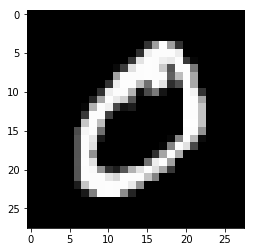

In [157]:
#Plotting a random sample from the train data
plt.imshow(X_train[1:2].reshape(28,28),cmap='gray')
y_train[1:2]

In [158]:
#Initializing a sequential model
model=keras.models.Sequential()

In [159]:
#Adding layes to the Sequential model
model.add(Dense(32,activation='sigmoid',input_shape=(28*28,)))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [160]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

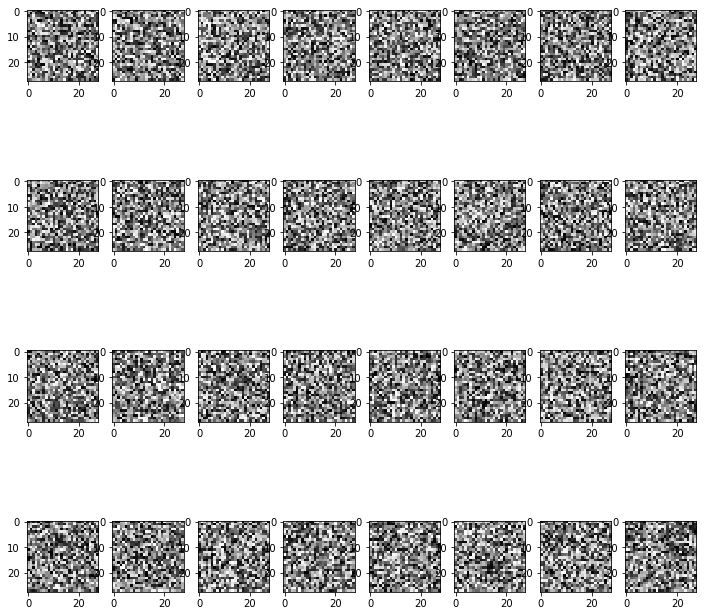

In [162]:
#Plotting weights of first layer with random initialization of weights
weights=[]
for i in model.layers:
    weights.append(i.get_weights())
layer1 = np.array(weights[0][0])
fig=plt.figure(figsize=(12, 12))
for i in range(1,33):
    fig.add_subplot(4,8,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')


In [163]:
model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 1.2817 - accuracy: 0.7230
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4692 - accuracy: 0.8908
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3207 - accuracy: 0.9154
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2590 - accuracy: 0.9294
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2226 - accuracy: 0.9388
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1973 - accuracy: 0.9452
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1781 - accuracy: 0.9499
Epoch 8/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1634 - accuracy: 0.9545
Epoch 9/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1514 - accuracy: 0.9565
Epoch 10/10
60000/60000 [==============================

In [164]:
score=model.evaluate(X_test,y_test)
print("Loss = ",score[0])
print("Accuracy = ",score[1])

10000/10000 [==============================] - 0s 31us/step
Loss =  0.15415416504591703
Accuracy =  0.9542999863624573


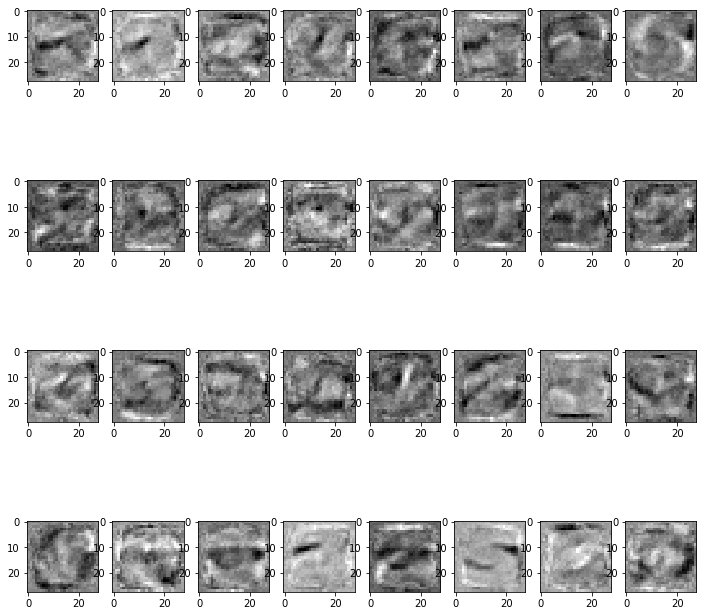

In [165]:
#Plotting weights of first layer af the model has learned the weights to fit the data
weights=[]
for i in model.layers:
    weights.append(i.get_weights())
layer1 = np.array(weights[0][0])
fig=plt.figure(figsize=(12, 12))
for i in range(1,33):
    fig.add_subplot(4,8,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')